In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
# Reading the dataset 
data = pd.read_csv("leukaemia_samples.csv")

In [5]:
#Checking the number of rows and columns of the dataset
data.shape

(38, 52)

In [6]:
# checking the first five rows of the dataset
data.head()

,38,Class,U22376,X59417,U05259,M92287,M31211,X74262,D26156,S50223,...,M62762,M28130,M63138,M57710,M69043,M81695,X85116,M19045,M83652,X04085
0,sample_12,ALL,551.0,846,2504,2056.0,334,209,329,90,...,1030,1855,1763,988,7901,494,530,3939,252,294
1,sample_25,ALL,1872.0,3878,5070,1689.0,481,489,738,301,...,933,4271,1371,560,14011,439,559,515,-49,747
2,sample_34,AML,1126.0,782,711,498.0,153,279,302,56,...,3236,3693,5587,394,13338,1702,727,4259,1338,5878
3,sample_35,AML,880.0,490,654,165.0,19,336,201,168,...,1125,-45,3909,72,2306,1137,1639,2517,565,2140
4,sample_36,AML,473.0,1648,-14,1309.0,88,194,667,-73,...,4647,11517,12358,5940,21135,2014,1096,15519,2892,5162


In [7]:
# checking the varibales name and its object type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   38      38 non-null     object 
 1   Class   38 non-null     object 
 2   U22376  37 non-null     float64
 3   X59417  38 non-null     int64  
 4   U05259  38 non-null     int64  
 5   M92287  37 non-null     float64
 6   M31211  38 non-null     int64  
 7   X74262  38 non-null     int64  
 8   D26156  38 non-null     int64  
 9   S50223  38 non-null     int64  
 10  M31523  37 non-null     float64
 11  L47738  38 non-null     int64  
 12  U32944  37 non-null     float64
 13  Z15115  38 non-null     int64  
 14  X13949  37 non-null     float64
 15  X63469  38 non-null     int64  
 16  M91432  38 non-null     int64  
 17  U29175  38 non-null     int64  
 18  Z69881  38 non-null     int64  
 19  U20998  38 non-null     int64  
 20  D38073  38 non-null     int64  
 21  U26266  38 non-null     int64  
 22  M313

In [8]:
# checking for the presence of duplicate response
data.duplicated().sum()

0

In [9]:
# checking columns for presence of missing data 
data.isnull().sum()

38        0
Class     0
U22376    1
X59417    0
U05259    0
M92287    1
M31211    0
X74262    0
D26156    0
S50223    0
M31523    1
L47738    0
U32944    1
Z15115    0
X13949    1
X63469    0
M91432    0
U29175    0
Z69881    0
U20998    0
D38073    0
U26266    0
M31303    0
Y08612    0
U35451    0
M29696    0
M13792    0
M55150    0
X95735    0
U50136    0
M16038    0
U82759    0
M23197    0
M84526    0
Y12670    0
M27891    0
X17042    0
Y00787    0
M96326    0
U46751    0
M80254    0
L08246    0
M62762    0
M28130    0
M63138    0
M57710    0
M69043    0
M81695    0
X85116    0
M19045    0
M83652    0
X04085    0
dtype: int64

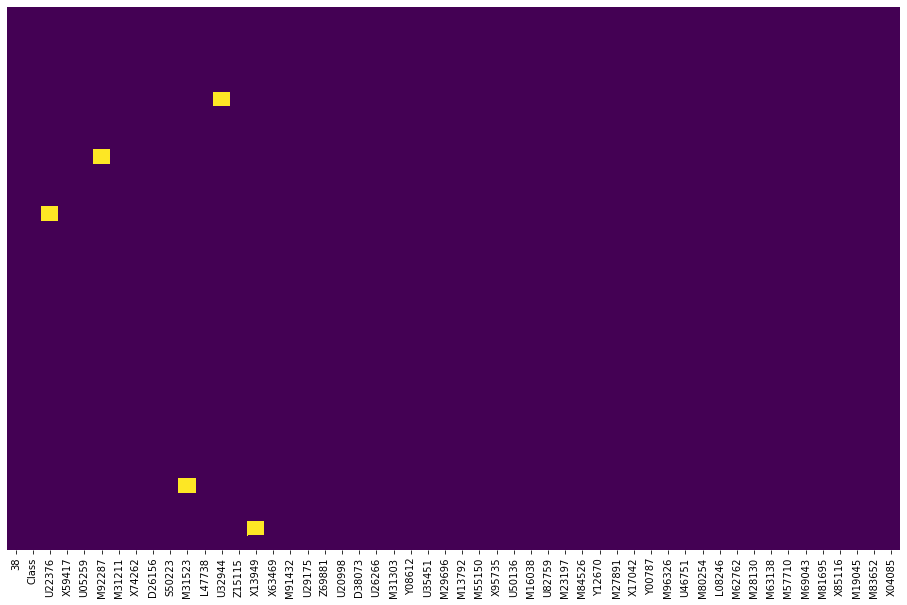

In [10]:
# visulaization of data for the prersence of missing data
fig = plt.gcf()
fig.set_size_inches(16, 10)
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [11]:
# Droping the irrelevant columns which are class and 38
data.drop(['Class',"38"],axis=1,inplace=True)

In [12]:
# Getting the statistics of each columns 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
U22376,37.0,2997.756757,2235.614499,186.0,1047.00,3085.0,4543.00,9177.0
X59417,38.0,3428.342105,2443.969592,99.0,1566.50,2735.5,5450.00,7782.0
U05259,38.0,2614.973684,2739.455050,-14.0,288.00,882.5,5073.75,9326.0
M92287,37.0,3231.729730,2413.886684,165.0,1484.00,2676.0,4093.00,10669.0
M31211,38.0,438.026316,307.484255,19.0,203.25,375.0,635.50,1487.0
X74262,38.0,1080.815789,977.386085,19.0,311.50,872.0,1399.75,4253.0
D26156,38.0,1095.500000,560.836477,201.0,699.25,991.0,1551.00,2191.0
S50223,38.0,267.000000,242.729858,-94.0,85.50,238.0,449.25,867.0
M31523,37.0,1056.621622,899.856666,126.0,389.00,787.0,1439.00,4555.0
L47738,38.0,945.184211,903.348721,-80.0,227.00,707.0,1396.50,3810.0


In [13]:
# Replacing missing data by their median 
fill_na = SimpleImputer(strategy='median')
data['U22376'] = fill_na.fit_transform(data[['U22376']])
data['M31523'] = fill_na.fit_transform(data[['M31523']])
data['U32944'] = fill_na.fit_transform(data[['U32944']])
data['X13949'] = fill_na.fit_transform(data[['X13949']])
data['M92287'] = fill_na.fit_transform(data[['M92287']]) 

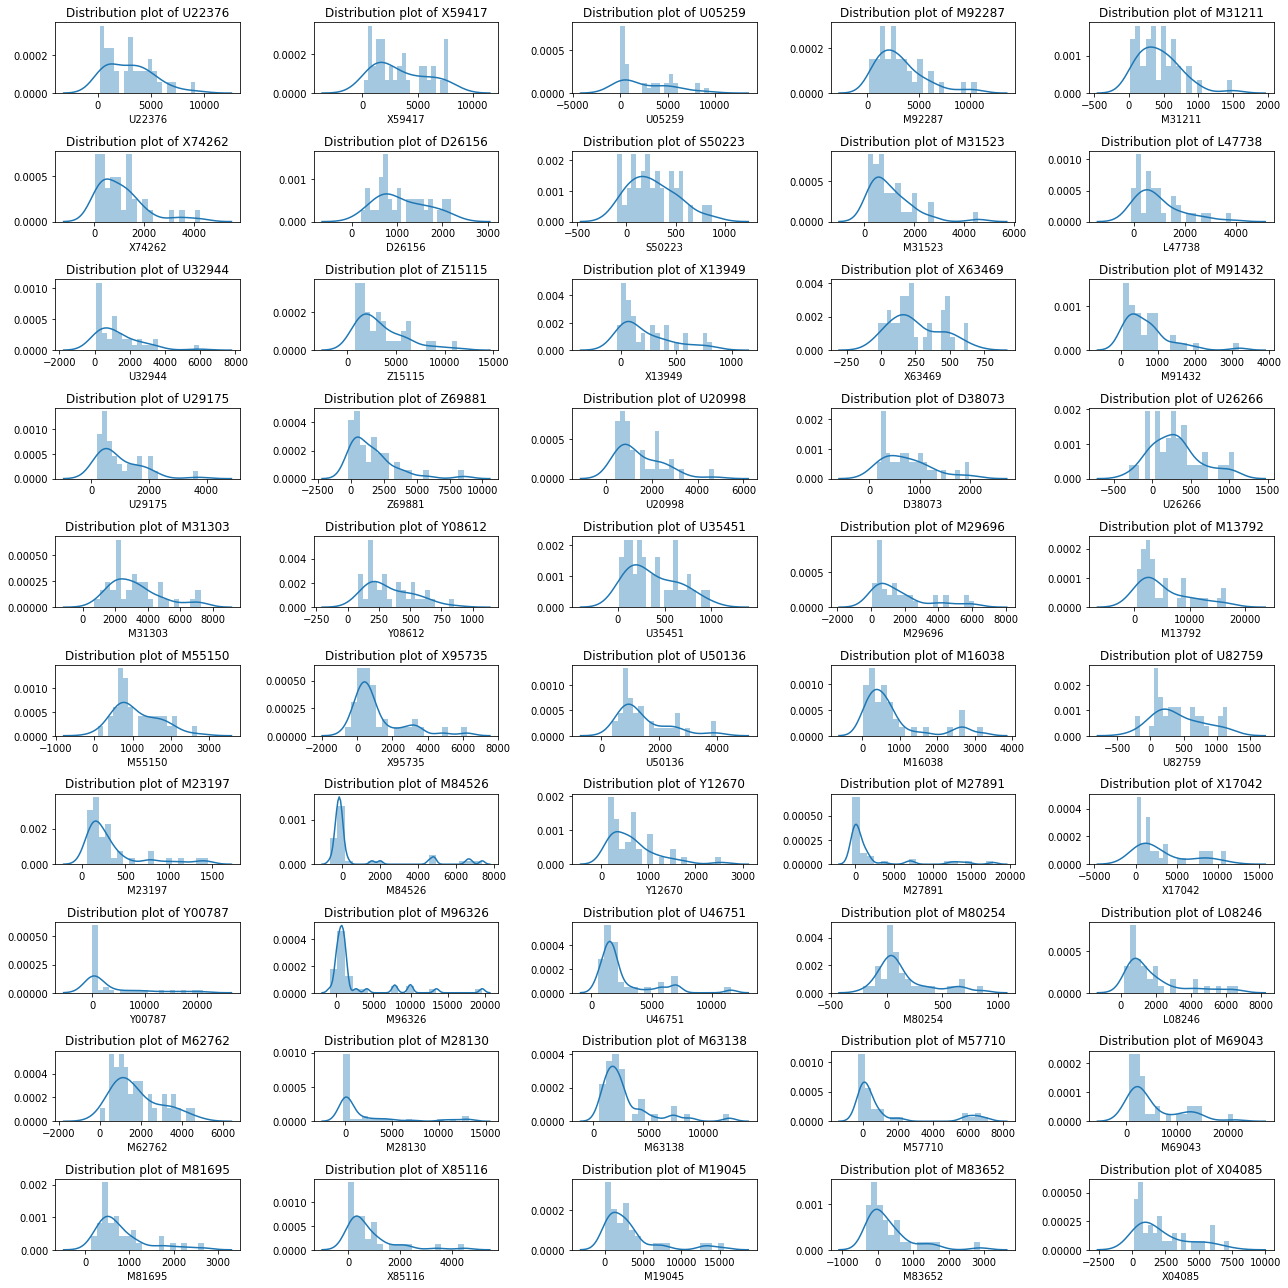

In [14]:
# visualizing the distribution of the variables to check for normality using distribution plot 
fig = plt.figure(figsize=(18,18))
for i,columns in enumerate(data.columns, 1): 
    ax = plt.subplot(10,5,i) 
    sns.distplot(data[columns], bins = 20) 
    ax.set_title(f'Distribution plot of {columns}') 
    plt.tight_layout(w_pad=2) 
plt.show() 

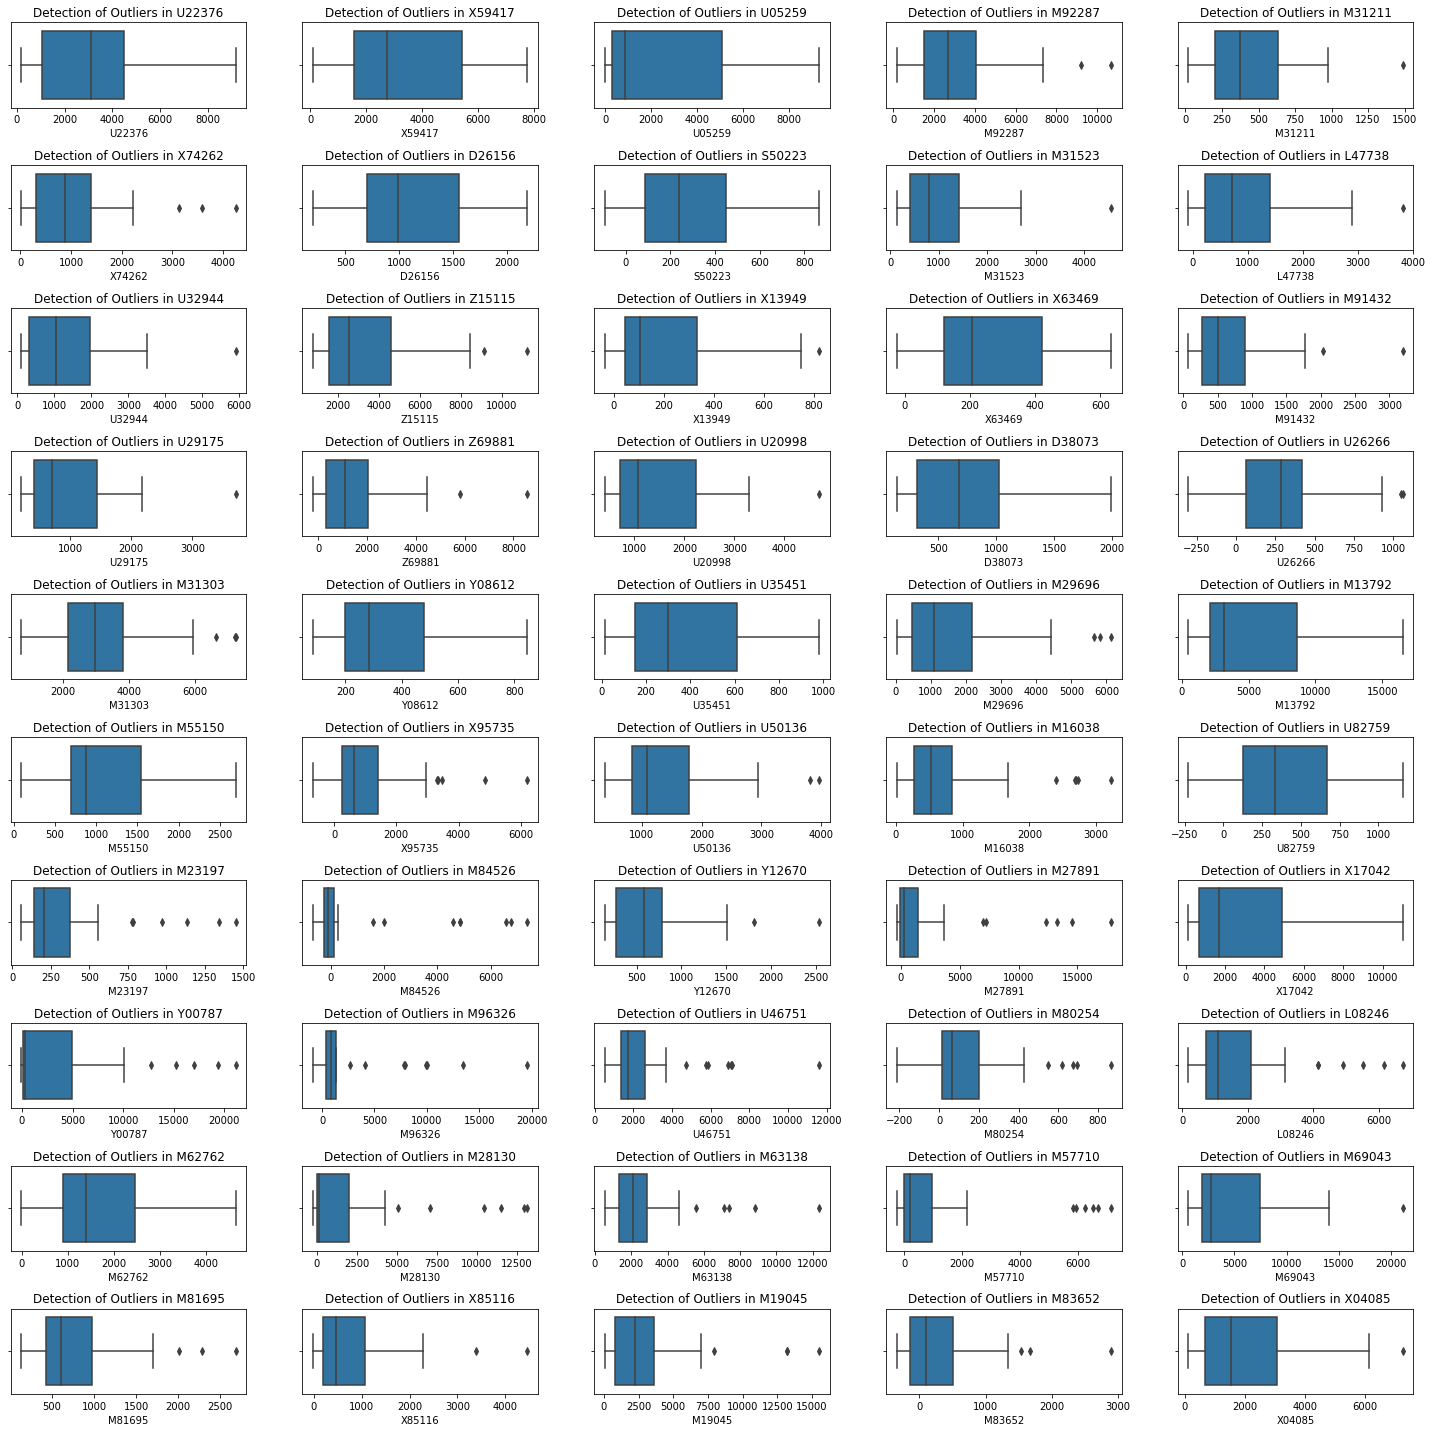

In [15]:
# visualizing the variables for detection of ouliers using box plot
fig = plt.figure(figsize=(20,20))
for i,columns in enumerate(data.columns, 1): 
    ax = plt.subplot(10,5,i) 
    sns.boxplot(data = data, x=data[columns]) 
    ax.set_title(f'Detection of Outliers in {columns}') 
    plt.tight_layout(w_pad=4) 
plt.show() 

In [16]:
# listing out columns with outliers 
outliers_data= data[['M92287','M31211','X74262','M31523','L47738','U32944','Z15115','X13949','M91432','U29175','Z69881',
            'U20998','U26266','M31303','M29696','X95735','U50136','M16038','M23197','M84526','Y12670','M27891',
            'Y00787','M96326', 'U46751', 'M80254', 'L08246', 'M28130','M63138', 'M57710', 'M69043', 
            'M81695', 'X85116', 'M19045', 'M83652','X04085']]

#coreecting the utliers uisng the upper quantile
for feature in outliers_data:
    Q1 = outliers_data[feature].quantile(0.25)
    Q3 = outliers_data[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    data.loc[data[feature] > upper,feature] = upper

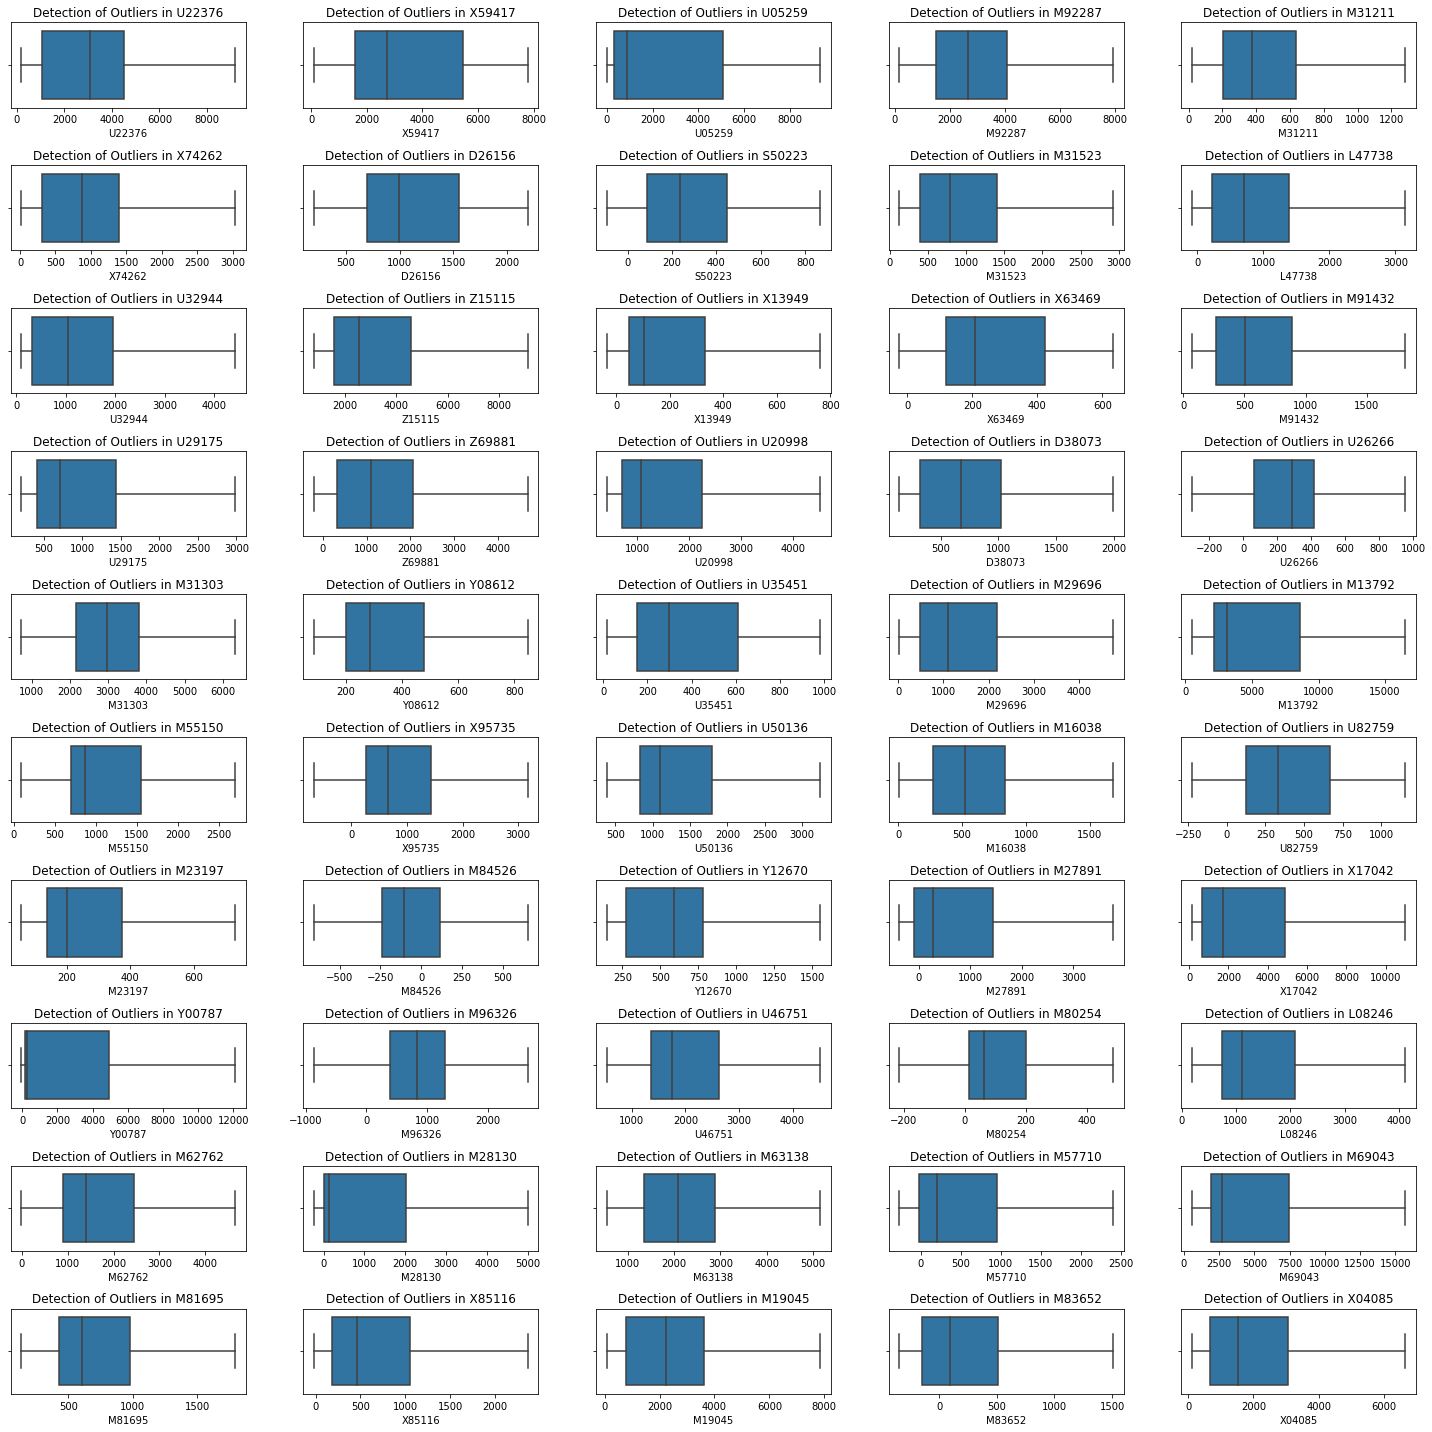

In [14]:
# visualizing the variables for detection of ouliers using box plot
fig = plt.figure(figsize=(20,20))
for i,columns in enumerate(data.columns, 1): 
    ax = plt.subplot(10,5,i) 
    sns.boxplot(data = data, x=data[columns]) 
    ax.set_title(f'Detection of Outliers in {columns}') 
    plt.tight_layout(w_pad=4) 
plt.show() 

In [15]:
#standardize the values in each column
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
final_data = pd.DataFrame(scaled_data,columns=data.columns)

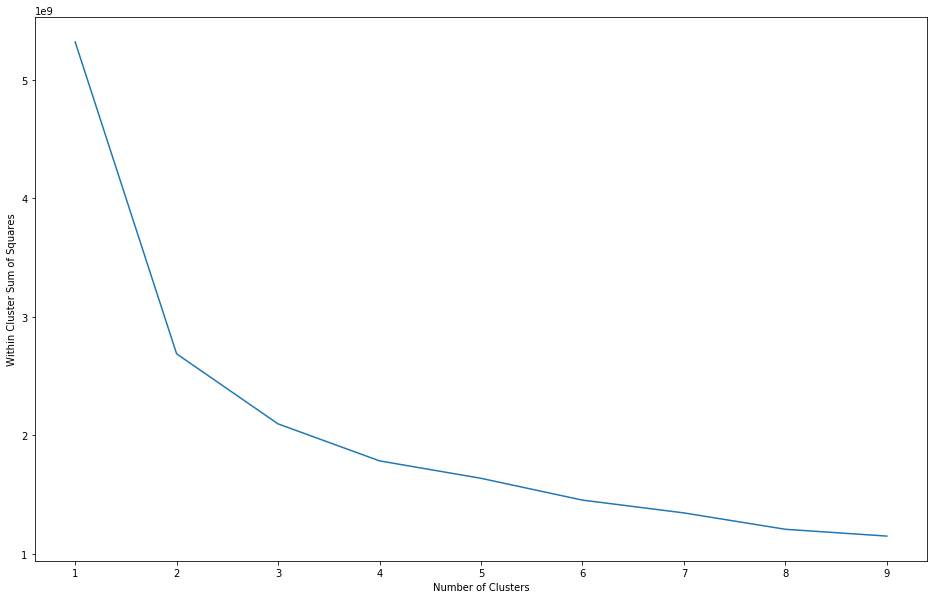

In [16]:
# using elbow methods to get the optimal number of cluster for Kmeans clustering
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',n_init = 10, max_iter = 100, random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
fig = plt.gcf()
fig.set_size_inches(16, 10)    
plt.plot(range(1,10),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares')
plt.show();

In [17]:
# implementation of Kmeans algorithm 
kms = KMeans(n_clusters=2, init='k-means++',max_iter = 100, n_init = 20,random_state=42)
cluster = kms.fit_predict(data)
centeriod = kms.cluster_centers_

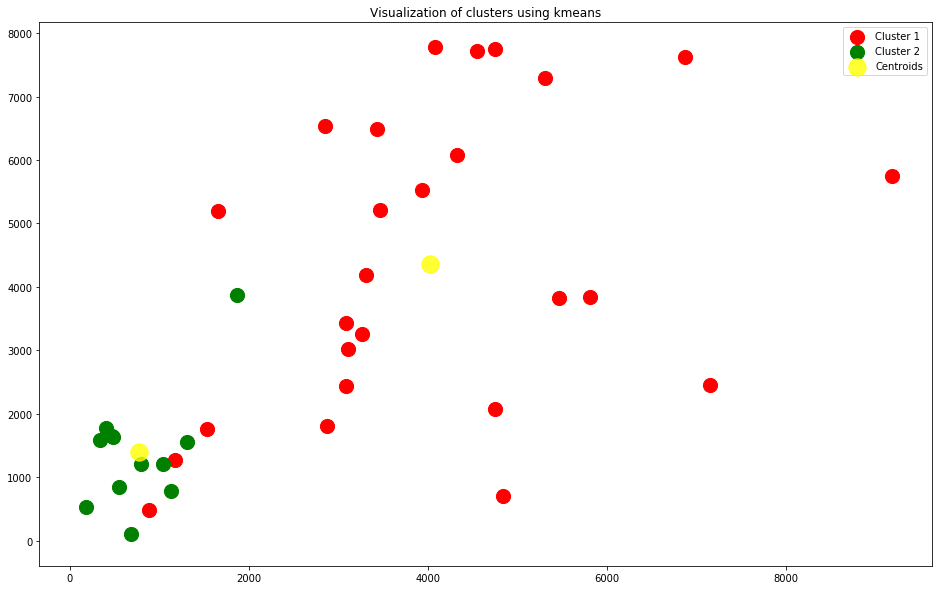

In [18]:
# Visualization of cluster in Kmeans
cluster_1 = data[cluster == 0]
cluster_2 = data[cluster == 1]
fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.scatter(cluster_1[data.columns[0]], cluster_1[data.columns[1]],s=200,color = 'red',label = 'Cluster 1')
plt.scatter(cluster_2[data.columns[0]], cluster_2[data.columns[1]],s=200 ,color = 'green',label = 'Cluster 2')
plt.scatter(centeriod[:, 0], centeriod[:, 1], c = 'yellow', s=300, alpha=0.8,label = 'Centroids');
plt.title('Visualization of clusters using kmeans')
plt.legend()
plt.show()

In [17]:
# Kmeans clustering validity using silhouette score
metrics.silhouette_score(data,kms.labels_,metric='euclidean')

0.42850038164556487

##  HIERARCHICAL  CLUSTERING 

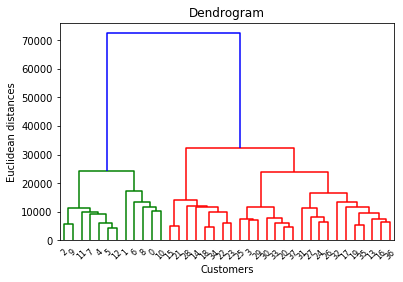

In [19]:
# using dendrogram to get the optimal number of cluster 
dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [20]:
# implementation of hierarchical algorithm 
from sklearn.cluster import AgglomerativeClustering 
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')
hc_cluster =hc.fit_predict(data)
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid(metric='euclidean')
clf.fit(data, hc_cluster)
hc_centroid= clf.centroids_

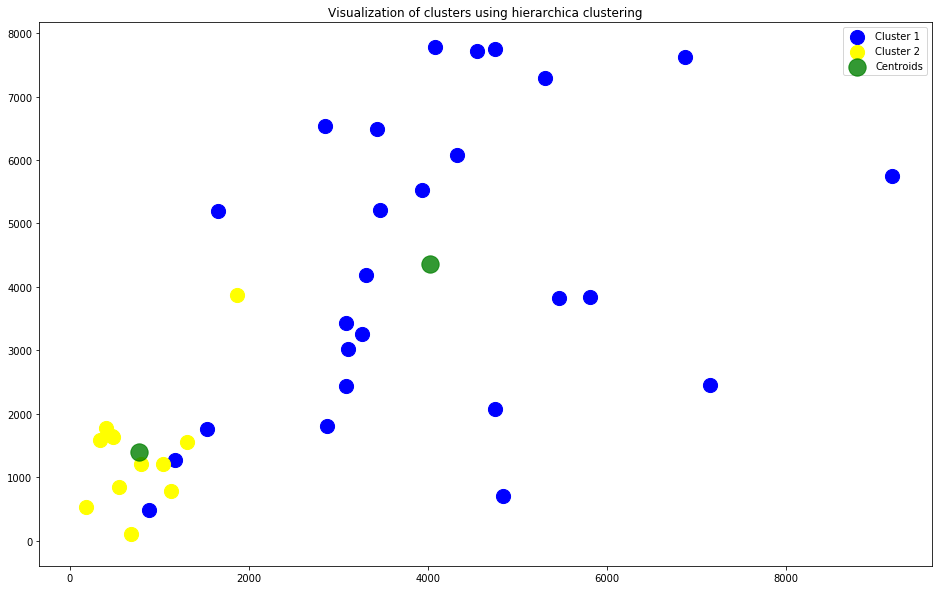

In [21]:
# Visualization of cluster in Kmeans
hc_cluster_1 = data[hc_cluster == 0]
hc_cluster_2 = data[hc_cluster == 1]
fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.scatter(hc_cluster_1[data.columns[0]], hc_cluster_1[data.columns[1]],s=200,color = 'blue',label = 'Cluster 1')
plt.scatter(hc_cluster_2[data.columns[0]], hc_cluster_2[data.columns[1]],s=200 ,color = 'yellow',label = 'Cluster 2')
plt.scatter(hc_centroid[:, 0], hc_centroid[:, 1], c = 'green', s=300, alpha=0.8,label = 'Centroids');
plt.title('Visualization of clusters using hierarchica clustering')
plt.legend()
plt.show()

In [22]:
# hierarchical clustering validity using silhouette score
metrics.silhouette_score(data,hc.labels_,metric='euclidean')

0.42850038164556487

In [26]:
# creating a columns for the kmeans and hierarchical labels
data['kms_cluster'] = kms.labels_
data['hc_cluster'] = hc.labels_

In [27]:
# showing the first five rows of the data
data.head()

,U22376,X59417,U05259,M92287,M31211,X74262,D26156,S50223,M31523,L47738,...,M63138,M57710,M69043,M81695,X85116,M19045,M83652,X04085,kms_cluster,hc_cluster
0,551.0,846,2504,2056.0,334.0,209.0,329,90,474.0,140.0,...,1763.00,988.000,7901.000,494.000,530.0,3939.0,252.000,294.0,1,1
1,1872.0,3878,5070,1689.0,481.0,489.0,738,301,553.0,223.0,...,1371.00,560.000,14011.000,439.000,559.0,515.0,-49.000,747.0,1,1
2,1126.0,782,711,498.0,153.0,279.0,302,56,299.0,12.0,...,5152.25,394.000,13338.000,1702.000,727.0,4259.0,1338.000,5878.0,1,1
3,880.0,490,654,165.0,19.0,336.0,201,168,389.0,218.0,...,3909.00,72.000,2306.000,1137.000,1639.0,2517.0,565.000,2140.0,0,0
4,473.0,1648,-14,1309.0,88.0,194.0,667,-73,126.0,8.0,...,5152.25,2397.125,15730.125,1794.125,1096.0,7854.5,1505.875,5162.0,1,1
